<a href="https://colab.research.google.com/github/jess22jess/EDP/blob/main/Ecuaci%C3%B3n_de_onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Math object>

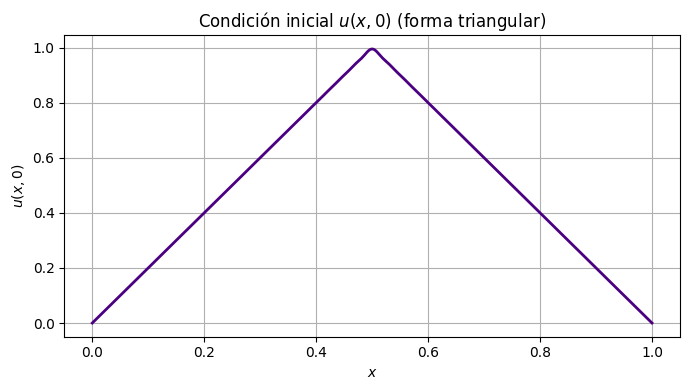

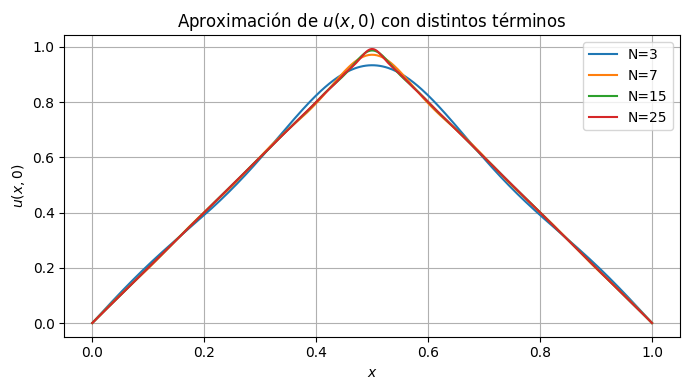

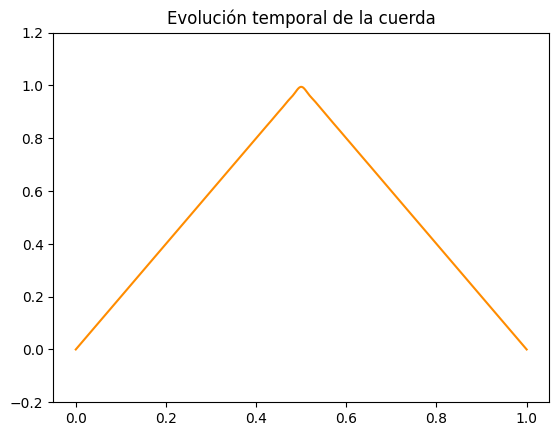

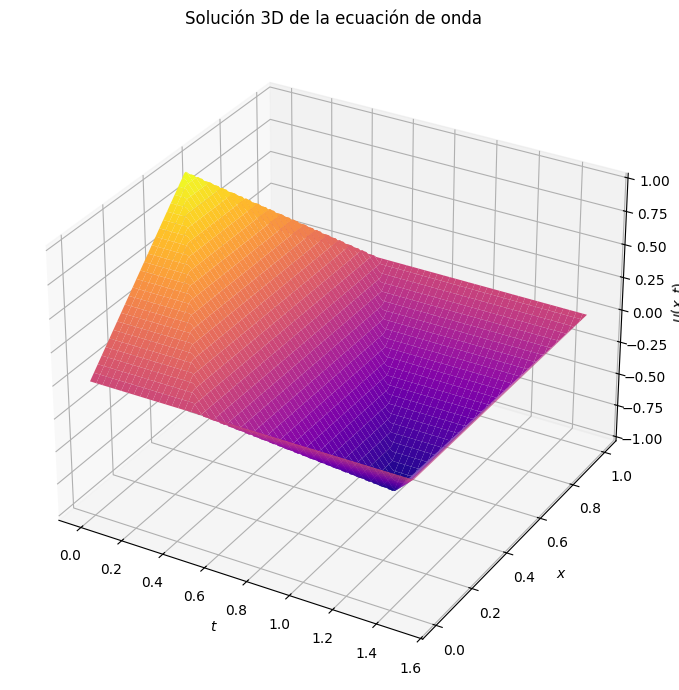

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Math

# Mostrar la solución analítica con fórmula en LaTeX
display(Math(r"""
u(x,t) = \sum_{\substack{n=1 \\ n\,\text{impar}}}^{\infty} \frac{8k}{(n\pi)^2} \sin\left( \frac{n\pi}{2} \right)
\sin\left( \frac{n\pi x}{L} \right) \cos\left( \frac{n\pi c t}{L} \right)
"""))

# Parámetros físicos
L = 1.0    # Longitud de la cuerda
c = 1.0    # Velocidad de propagación
k = 1.0    # Altura máxima de la condición inicial
N_terms = 40  # Términos de la serie (pares ignorados)

# Dominio espacial
x_vals = np.linspace(0, L, 400)

# Función solución u(x,t)
def onda(x, t, N):
    resultado = np.zeros_like(x)
    for n in range(1, 2*N, 2):  # Solo impares
        coef = (8 * k) / (np.pi * n)**2
        parte_espacial = np.sin(n * np.pi * x / L)
        parte_temporal = np.cos(n * np.pi * c * t / L)
        resultado += coef * np.sin(n * np.pi / 2) * parte_espacial * parte_temporal
    return resultado

# Visualizar perfil inicial
plt.figure(figsize=(7, 4))
plt.plot(x_vals, onda(x_vals, 0, N_terms), color='indigo', lw=2)
plt.title("Condición inicial $u(x,0)$ (forma triangular)")
plt.xlabel("$x$")
plt.ylabel("$u(x,0)$")
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparación de diferentes números de términos
plt.figure(figsize=(7, 4))
for N in [3, 7, 15, 25]:
    plt.plot(x_vals, onda(x_vals, 0, N), label=f'N={N}')
plt.title("Aproximación de $u(x,0)$ con distintos términos")
plt.xlabel("$x$")
plt.ylabel("$u(x,0)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Animación 1D: propagación de la onda
fig_anim, ax_anim = plt.subplots()
linea, = ax_anim.plot(x_vals, onda(x_vals, 0, N_terms), color='darkorange')
ax_anim.set_ylim(-0.2, 1.2)
ax_anim.set_title("Evolución temporal de la cuerda")

def actualizar(tiempo):
    linea.set_ydata(onda(x_vals, tiempo, N_terms))
    ax_anim.set_title(f"t = {tiempo:.2f} s")
    return linea,

anim = FuncAnimation(fig_anim, actualizar, frames=np.linspace(0, 2, 100), interval=60)
plt.show()

# Visualización 3D de la solución u(x,t)
x_3d = np.linspace(0, L, 150)
t_3d = np.linspace(0, 1.5, 150)
X, T = np.meshgrid(x_3d, t_3d)

def onda_malla(X, T, N):
    suma = np.zeros_like(X)
    for n in range(1, 2*N, 2):
        coef = (8 * k) / (n * np.pi)**2
        suma += coef * np.sin(n * np.pi / 2) * np.sin(n * np.pi * X / L) * np.cos(n * np.pi * c * T / L)
    return suma

U = onda_malla(X, T, N_terms)

fig_3d = plt.figure(figsize=(12, 7))
ax3d = fig_3d.add_subplot(111, projection='3d')
ax3d.plot_surface(T, X, U, cmap='plasma')
ax3d.set_xlabel('$t$')
ax3d.set_ylabel('$x$')
ax3d.set_zlabel('$u(x,t)$')
ax3d.set_title("Solución 3D de la ecuación de onda")
plt.tight_layout()
plt.show()

